# 01 — Time Series Fundamentals & Visualization

This notebook introduces basic concepts: time axis, trend, seasonality, cycle, noise, and common plots.
We'll generate a synthetic monthly time series with a trend + seasonality + noise to keep things reproducible.


In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Reproducibility
rng = np.random.default_rng(42)

# Create a monthly date index
idx = pd.date_range(start="2015-01-01", periods=120, freq="MS")  # 10 years monthly

In [5]:
# Components
trend = np.linspace(50, 150, len(idx))
seasonal = 10*np.sin(2*np.pi*idx.month/12)
noise = rng.normal(0, 3, len(idx))

In [6]:
y = trend + seasonal + noise
ts = pd.Series(y, index=idx, name="value")
ts.head()

,value
2015-01-01,55.914151
2015-02-01,56.380638
2015-03-01,63.932026
2015-04-01,64.002957
2015-05-01,52.508239


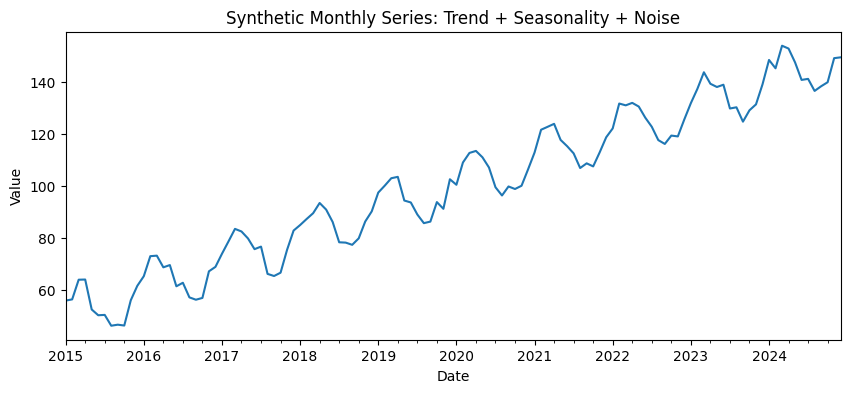

In [10]:
# Line plot
plt.figure(figsize=(10,4))
ts.plot()
plt.title("Synthetic Monthly Series: Trend + Seasonality + Noise")
plt.xlabel("Date"); plt.ylabel("Value")
plt.show()

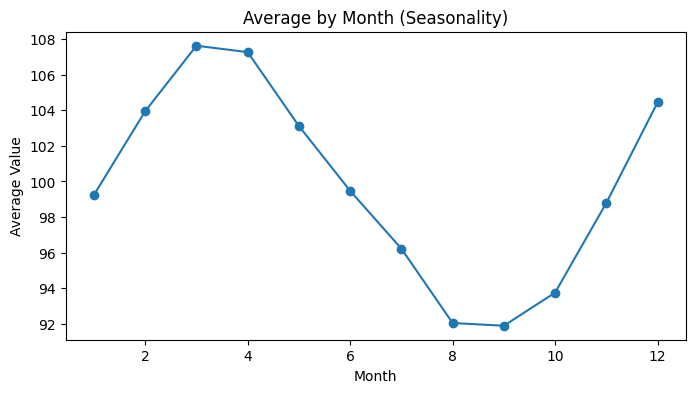

In [11]:
# Seasonal plot: group by month to see typical seasonal pattern
monthly_mean = ts.groupby(ts.index.month).mean()
plt.figure(figsize=(8,4))
monthly_mean.plot(marker="o")
plt.title("Average by Month (Seasonality)")
plt.xlabel("Month"); plt.ylabel("Average Value")
plt.show()

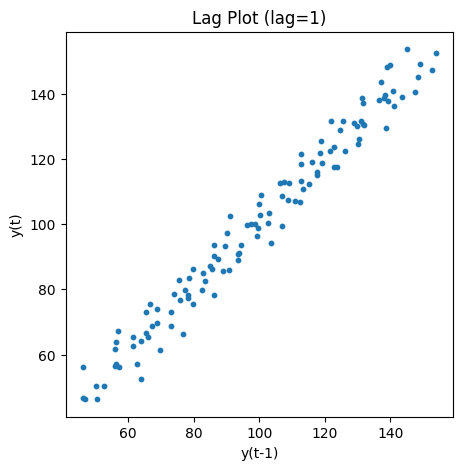

In [12]:
# Lag plot (value vs lag-1)
import pandas as pd
lag1 = pd.DataFrame({"y_t": ts[1:].values, "y_t-1": ts[:-1].values})
plt.figure(figsize=(5,5))
plt.scatter(lag1["y_t-1"], lag1["y_t"], s=10)
plt.title("Lag Plot (lag=1)")
plt.xlabel("y(t-1)"); plt.ylabel("y(t)")
plt.show()

**Takeaways**
- Time order matters.
- We can see a long-term upward trend and a yearly seasonal wave.
- Lag plots reveal autocorrelation (points line up along a diagonal).